In [1]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=83fbb04c3380244ed10f12d7a200fd1833e3bf922c8f37ffe37deff0238e2150
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [2]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

import wikipedia
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
#Scraping Wikipedia Articles
artificial_intelligence = wikipedia.page("Artificial Intelligence").content
Data_science = wikipedia.page("Data Science").content
deep_learning = wikipedia.page("Deep Learning").content
neural_network = wikipedia.page("Neural Network").content

artificial_intelligence = sent_tokenize(artificial_intelligence)
Data_science = sent_tokenize(Data_science)
deep_learning = sent_tokenize(deep_learning)
neural_network = sent_tokenize(neural_network)

artificial_intelligence.extend(Data_science)
artificial_intelligence.extend(deep_learning)
artificial_intelligence.extend(neural_network)

In [7]:
#Data Preprocessing
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [10]:
sent = preprocess_text("Artificial  intelligence, is the most advanced technology of the present era")
print(sent)


final_corpus = [preprocess_text(sentence) for sentence in artificial_intelligence if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]


artificial intelligence advanced technology present


In [11]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [12]:
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

In [13]:
print(ft_model.wv['artificial'])

[ 4.71398048e-02  1.67775616e-01  1.05872661e-01 -3.31401825e-01
  2.57186949e-01  2.58488178e-01 -8.36252887e-03  8.06308631e-03
  9.06530861e-03 -4.24778074e-01 -6.76711619e-01  3.86130720e-01
 -9.45273861e-02 -1.13989279e-01  1.44981027e-01  4.14227962e-01
  3.20574701e-01 -4.79525141e-02  3.05986196e-01  1.11146094e-02
 -1.05501235e-01  2.30556980e-01  6.02244250e-02 -2.78098673e-01
 -8.19751178e-04 -1.74468562e-01 -4.82417077e-01  5.49856305e-01
  2.22924009e-01  2.77492851e-01 -1.49039645e-02 -3.18037122e-01
  5.97520880e-02 -2.15663835e-02  9.74843651e-02  1.12631600e-02
  1.67006791e-01 -1.69513106e-01 -1.73642918e-01 -3.41269784e-02
 -3.69520020e-03 -5.01826815e-02 -1.07229352e-01  1.16692901e-01
  2.49175891e-01 -1.20403551e-01 -9.47388709e-02 -9.08777952e-01
  8.29004869e-02 -6.63566142e-02  5.36714680e-02  5.65241158e-01
 -2.00776458e-01 -4.25410271e-01 -2.34652385e-01 -6.79074898e-02
  8.30212712e-01  5.16276918e-02 -2.82906979e-01 -4.64165002e-01]


In [14]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'deep']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['intelligence', 'machine', 'simulated', 'philosophical', 'moral']
intelligence:['artificial', 'intelligent', 'machine', 'simulated', 'human']
machine:['ethic', 'ethical', 'artificial', 'intelligence', 'argument']
network:['neural', 'convolutional', 'recurrent', 'biological', 'unit']
recurrent:['network', 'convolutional', 'neural', 'vision', 'unsupervised']
deep:['learning', 'belief', 'convolutional', 'generative', 'speech']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [15]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))


['artificial', 'intelligence', 'machine', 'simulated', 'philosophical', 'moral', 'intelligence', 'artificial', 'intelligent', 'machine', 'simulated', 'human', 'machine', 'ethic', 'ethical', 'artificial', 'intelligence', 'argument', 'network', 'neural', 'convolutional', 'recurrent', 'biological', 'unit', 'recurrent', 'network', 'convolutional', 'neural', 'vision', 'unsupervised', 'deep', 'learning', 'belief', 'convolutional', 'generative', 'speech']
<class 'list'>
36


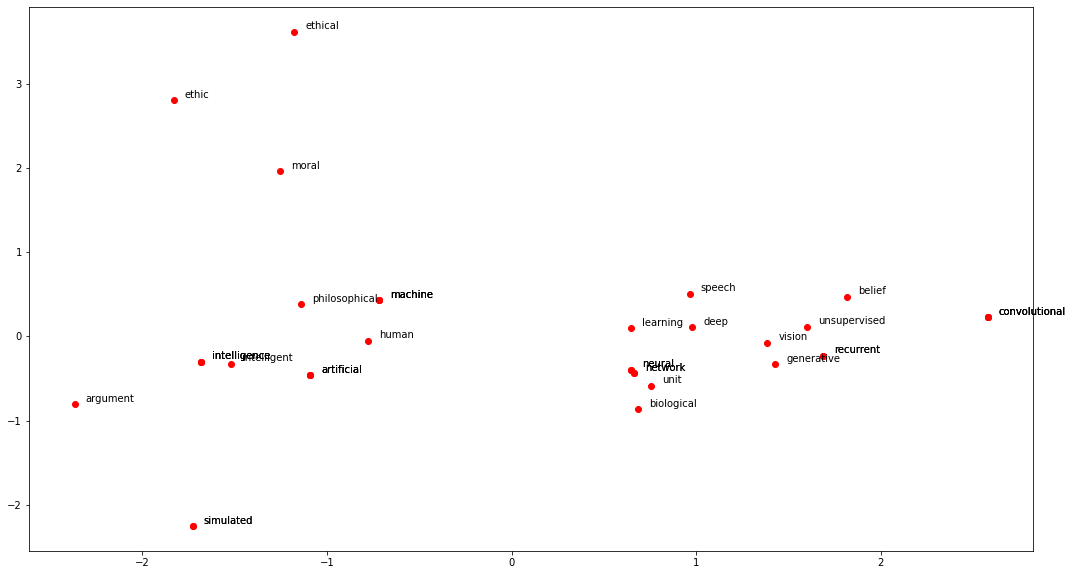

In [16]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')